In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LGD_DATA.csv")

In [3]:
df.columns=['Acc_no','Age','Years_of_experience','Number_of_vehicles','Gender','Married','Loss_in_thousands']
df.columns

Index(['Acc_no', 'Age', 'Years_of_experience', 'Number_of_vehicles', 'Gender',
       'Married', 'Loss_in_thousands'],
      dtype='object')

-----

Handling Categorical Variables

In [4]:
dummyvar1=pd.get_dummies(df.Gender,drop_first=True)
dummyvar2=pd.get_dummies(df.Married,drop_first=True)

In [5]:
df_new=pd.concat([df.drop(['Married','Gender'],axis=1),dummyvar1,dummyvar2],axis=1)

In [6]:
#normalizing the Loss_in_thousands variable
df_new['Log_of_loss']=list(map(math.log,df.Loss_in_thousands))
df_new.head()

,Acc_no,Age,Years_of_experience,Number_of_vehicles,Loss_in_thousands,M,Single,Log_of_loss
0,150024,24,5,1,203.319595,1,0,5.314779
1,144880,31,10,1,402.197302,0,1,5.996943
2,133742,56,37,1,553.132096,1,0,6.315597
3,151282,52,31,1,292.430579,0,0,5.678227
4,174407,20,3,1,246.540576,1,1,5.507527


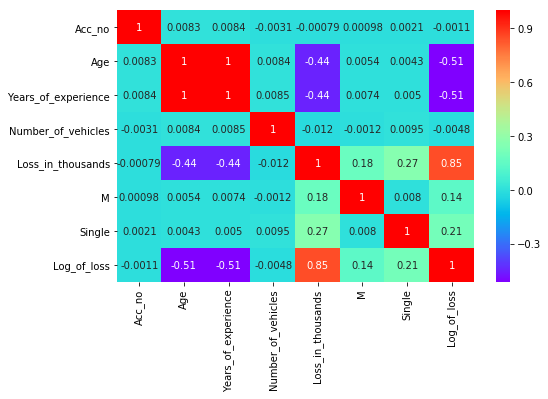

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(df_new.corr(),annot=True,cmap='rainbow')

-----

Trian-Test Split

In [8]:
from sklearn.model_selection import train_test_split
x=df_new[['Age','Number_of_vehicles','M','Single']]
y=df_new.Log_of_loss
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression(normalize=True) #build the model

In [10]:
Lin_reg.fit(x_train,y_train) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

6.348800034365884
[-0.02044543  0.00071645  0.21452345  0.31707863]


loss in thousand = 6.3488 - 0.02(Age) + 0.00071(Number of vehicles) + 0.2145(Male) + 0.31707(Single)

In [12]:
#performance on training data
y_train_pred=Lin_reg.predict(x_train)
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(y_train,y_train_pred))
print('MAPE is ',abs((y_train-y_train_pred)/y_train).mean()*100)

R2 Score:  0.3254675688563612
MAPE is  8.81201406194201


In [13]:
#performance on testing data
y_pred=Lin_reg.predict(x_test)
print('R2 Score: ',metrics.r2_score(y_test,y_pred))
print('MAPE is ',abs((y_test-y_pred)/y_test).mean()*100)

R2 Score:  0.32516938297820974
MAPE is  8.719115120389416


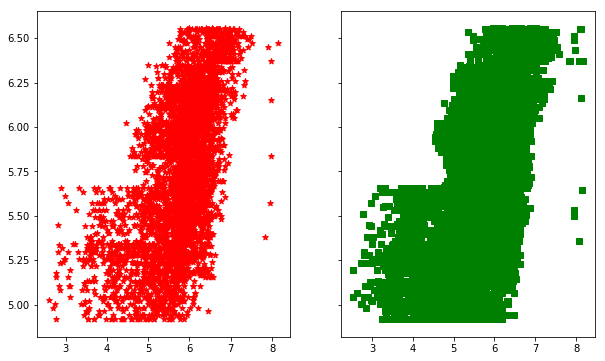

In [14]:
fig, ax=plt.subplots(1,2, sharey=True,figsize=(10,6))
ax[0].scatter(y_test,y_pred,marker='*',c='r')
ax[1].scatter(y_train,y_train_pred,marker='s',c='g')